In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

##Procese el archivo para dejarlo en un formato fácil de importar a Python.

In [2]:
#Descargo y limpio el archivo
os.system("bash limpiador.sh")

0

In [3]:
#Importo los datos
correr = np.genfromtxt("datoscorrer.csv",delimiter=",",names=True)

#Convierto el tiempo a horas
tiempo = correr['hour'] + correr['min']/60 + correr['sec']/60

##Haciendo los cambios de unidades pertinentes y teniendo en cuenta las características del [sistema de coordenadas esférico](http://mathworld.wolfram.com/SphericalCoordinates.html), calcular las coordenadas cartesianas de cada una de las posiciones registradas.

In [4]:
r = 6371#Km
x = r*np.sin(np.deg2rad(90 - correr['lat']))*np.cos(np.deg2rad(correr['lon']))
y = r*np.sin(np.deg2rad(90 - correr['lat']))*np.sin(np.deg2rad(correr['lon']))
z = r*np.cos(np.deg2rad(correr['lon']))

##Después calcular los vectores de desplazamiento espacio-temporal tomando como referencia la primera posición registrada. Desprecie la altura.

In [5]:
deltax = x - x[0]
deltay = y - y[0]
deltaz = z - z[0]

deltar = []
for i in range(len(deltax)):
    deltar.append([deltax[i],deltay[i],deltaz[i]])
deltar = np.array(deltar)

##Usando vectores unitarios en dirección norte y oriente, calcule las coordenadas de los vectores de desplazamiento en ese sistema de coordenadas local. Tome como coordenadas de referencia: latitud 4.5981, longitud -74.0758. Haga una gráfica con la trayectoria. Si quiere que aparezca junto con un mapa busque información sobre **smopy**.

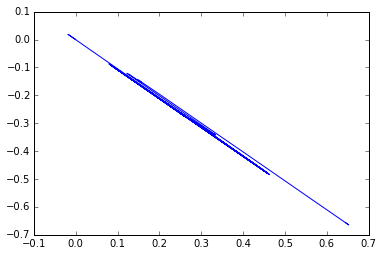

In [12]:
latB = 4.5981
lonB = -74.0758

teta = np.deg2rad(lonB)
fi = np.deg2rad(90 - latB)

unitEast = np.array([-np.sin(teta),np.cos(teta),0])
unitNorth = np.array([np.cos(teta)*np.cos(fi),np.sin(teta)*np.cos(fi),-np.sin(fi)])

deltaxb = np.dot(deltar,unitNorth)
deltayb = np.dot(deltar,unitEast)

plt.plot(deltaxb,deltayb)

##Ahora calcule la distancia recorrida en función del tiempo estimando numéricamente la integral.

##Estime el tiempo requerido para terminar de recorrer 1, 2 .. 9 km y la posición (en latitud y longitud) en esos instantes.